# 아미노산 빈도 계산하기

이번에는 파이썬을 이용해서 단백질에서 아미노산의 서열 빈도를 계산하겠습니다.

##  Protein?

> Protein(단백질)은 생물의 몸을 구성하는 고분자 유기 물질이다. 그리스어의 proteios에서 유래된 것이다. 수많은 아미노산의 연결체로 20가지의 서로 다른 아미노산들이 펩타이드 결합이라고 하는 화학 결합으로 길게 연결된 것을 폴리펩타이드라고 한다. - 위키백과
 
위키백과에 서술되어 있듯이, 단백질은 20가지의 아미노산으로 구성되어 있어요. 아미노산의 서열이 어떻게 다르냐에 따라서 다른 단백질이 되죠.

## 예제

**Factor8** 이라고 하는 혈우병에 관련된 단백질을 가지고 예를 들어 보겠습니다. 
```
Factor 8 (FVIII) is an essential blood-clotting protein, also known as anti-hemophilic factor (AHF). 
In humans, factor 8 is encoded by the F8 gene. Defects in this gene result in hemophilia A.
```
아미노산은 대문자 알파벳으로 표현되어 있습니다. 각각의 약어가 뜻하는 아미노산은 [링크](https://ko.wikipedia.org/wiki/%EC%95%84%EB%AF%B8%EB%85%B8%EC%82%B0) 에서 확인하세요.

In [1]:
%matplotlib inline
# 필요한 라이브러리를 불러들입니다.
import pandas as pd
import matplotlib.pyplot as plt

단백질의 서열을 문자열로 넣어줬습니다.

In [2]:
protein_seq = '''MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVPKSFPFN
TSVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAV
GVSYWKASEGAEYDDQTSQREKEDDKVFPGGSHTYVWQVLKENGPMASDPLCLTYSYLSH
VDLVKDLNSGLIGALLVCREGSLAKEKTQTLHKFILLFAVFDEGKSWHSETKNSLMQDRD
AASARAWPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEVHSIFLEGHTFLVRNH
RQASLEISPITFLTAQTLLMDLGQFLLFCHISSHQHDGMEAYVKVDSCPEEPQLRMKNNE
EAEDYDDDLTDSEMDVVRFDDDNSPSFIQIRSVAKKHPKTWVHYIAAEEEDWDYAPLVLA
PDDRSYKSQYLNNGPQRIGRKYKKVRFMAYTDETFKTREAIQHESGILGPLLYGEVGDTL
LIIFKNQASRPYNIYPHGITDVRPLYSRRLPKGVKHLKDFPILPGEIFKYKWTVTVEDGP
TKSDPRCLTRYYSSFVNMERDLASGLIGPLLICYKESVDQRGNQIMSDKRNVILFSVFDE
NRSWYLTENIQRFLPNPAGVQLEDPEFQASNIMHSINGYVFDSLQLSVCLHEVAYWYILS
IGAQTDFLSVFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWILGCHNSDFRNRG
MTALLKVSSCDKNTGDYYEDSYEDISAYLLSKNNAIEPRSFSQNSRHPSTRQKQFNATTI
PENDIEKTDPWFAHRTPMPKIQNVSSSDLLMLLRQSPTPHGLSLSDLQEAKYETFSDDPS
PGAIDSNNSLSEMTHFRPQLHHSGDMVFTPESGLQLRLNEKLGTTAATELKKLDFKVSST
SNNLISTIPSDNLAAGTDNTSSLGPPSMPVHYDSQLDTTLFGKKSSPLTESGGPLSLSEE
NNDSKLLESGLMNSQESSWGKNVSSTESGRLFKGKRAHGPALLTKDNALFKVSISLLKTN
KTSNNSATNRKTHIDGPSLLIENSPSVWQNILESDTEFKKVTPLIHDRMLMDKNATALRL
NHMSNKTTSSKNMEMVQQKKEGPIPPDAQNPDMSFFKMLFLPESARWIQRTHGKNSLNSG
QGPSPKQLVSLGPEKSVEGQNFLSEKNKVVVGKGEFTKDVGLKEMVFPSSRNLFLTNLDN
LHENNTHNQEKKIQEEIEKKETLIQENVVLPQIHTVTGTKNFMKNLFLLSTRQNVEGSYD
GAYAPVLQDFRSLNDSTNRTKKHTAHFSKKGEEENLEGLGNQTKQIVEKYACTTRISPNT
SQQNFVTQRSKRALKQFRLPLEETELEKRIIVDDTSTQWSKNMKHLTPSTLTQIDYNEKE
KGAITQSPLSDCLTRSHSIPQANRSPLPIAKVSSFPSIRPIYLTRVLFQDNSSHLPAASY
RKKDSGVQESSHFLQGAKKNNLSLAILTLEMTGDQREVGSLGTSATNSVTYKKVENTVLP
KPDLPKTSGKVELLPKVHIYQKDLFPTETSNGSPGHLDLVEGSLLQGTEGAIKWNEANRP
GKVPFLRVATESSAKTPSKLLDPLAWDNHYGTQIPKEEWKSQEKSPEKTAFKKKDTILSL
NACESNHAIAAINEGQNKPEIEVTWAKQGRTERLCSQNPPVLKRHQREITRTTLQSDQEE
IDYDDTISVEMKKEDFDIYDEDENQSPRSFQKKTRHYFIAAVERLWDYGMSSSPHVLRNR
AQSGSVPQFKKVVFQEFTDGSFTQPLYRGELNEHLGLLGPYIRAEVEDNIMVTFRNQASR
PYSFYSSLISYEEDQRQGAEPRKNFVKPNETKTYFWKVQHHMAPTKDEFDCKAWAYFSDV
DLEKDVHSGLIGPLLVCHTNTLNPAHGRQVTVQEFALFFTIFDETKSWYFTENMERNCRA
PCNIQMEDPTFKENYRFHAINGYIMDTLPGLVMAQDQRIRWYLLSMGSNENIHSIHFSGH
VFTVRKKEEYKMALYNLYPGVFETVEMLPSKAGIWRVECLIGEHLHAGMSTLFLVYSNKC
QTPLGMASGHIRDFQITASGQYGQWAPKLARLHYSGSINAWSTKEPFSWIKVDLLAPMII
HGIKTQGARQKFSSLYISQFIIMYSLDGKKWQTYRGNSTGTLMVFFGNVDSSGIKHNIFN
PPIIARYIRLHPTHYSIRSTLRMELMGCDLNSCSMPLGMESKAISDAQITASSYFTNMFA
TWSPSKARLHLQGRSNAWRPQVNNPKEWLQVDFQKTMKVTGVTTQGVKSLLTSMYVKEFL
ISSSQDGHQWTLFFQNGKVKVFQGNQDSFTPVVNSLDPPLLTRYLRIHPQSWVHQIALRM
EVLGCEAQDLY'''

단백질 서열에 줄바꿈이 있는지를 확인하고, 그리고 총 2351개의 아미노산 갯수가 세보겠습니다.

In [3]:
# data check
protein_seq = protein_seq.replace('\n','')
len(protein_seq)

2351

`len` 기능을 이용해서 간단하게 갯수가 2351개임을 알 수 있어요

## 빈도 계산하기

파이썬 기본 라이브러리인 `counter`에는 `collections`이라는 기능이 이미 들어있습니다. 이 기능을 이용해서 아미노산의 갯수를 세어 보겠습니다.

In [4]:
from collections import Counter
table = Counter(protein_seq)
table

Counter({'A': 110,
         'C': 26,
         'D': 121,
         'E': 148,
         'F': 109,
         'G': 129,
         'H': 75,
         'I': 110,
         'K': 158,
         'L': 222,
         'M': 61,
         'N': 125,
         'P': 128,
         'Q': 110,
         'R': 104,
         'S': 219,
         'T': 155,
         'V': 125,
         'W': 37,
         'Y': 79})

이제 **factor8**이라는 단백질의 아미노산 빈도를 알 수 있어요. A(알라닌)은 110개 이군요. 

## 시각화

좀 더 편하게 시각화하기 위해 `pandas`의 `dataframe`으로 데이터를 변환 하겠습니다.

In [5]:
df = pd.DataFrame.from_dict(table, orient='index')
df2 = df.rename(columns={'index':'AA', 0:'count'}) # column의 label을 변경해줍니다.
df2.head()

,count
A,110
C,26
E,148
D,121
G,129


### 막대 그래프 그리기


Text(0.5,1,u'frequency of amino acid ')

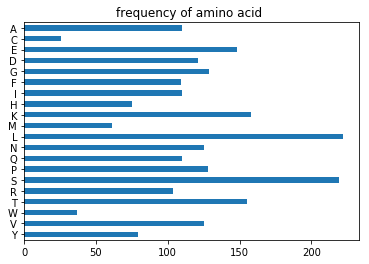

In [6]:
df2[::-1].plot.barh(legend=None) # [::-1]은 순서를 맞추기 위함입니다
plt.title('frequency of amino acid ')

### 파이차트 그리기
상대적인 아미노산의 빈도를 알아보기에는 파이차트가 좀 더 나을 것 같네요.

Text(0.5,1,u'frequency of amino acid ')

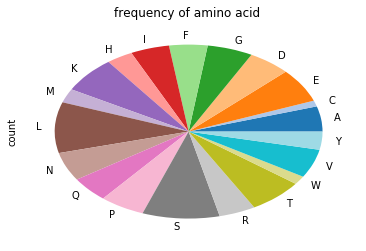

In [7]:
df2.plot.pie(subplots=True, legend = None, colormap = 'tab20') # 20가지의 색상을 표현하기 위해 color map을 변경했습니다.
plt.title('frequency of amino acid ')

## 결론

확실히, 막대 그래프보다는 파이차트가 눈에 잘 들어옵니다. 하지만 정확한 값은 알기 어렵군요.
위의 예를 보면 Leucine과 Serine의 빈도가 높고 반면에 Cysteine은 매우 적은 것을 확인 할 수 있습니다.  

이것을 응용해서 다음 번에는 여러개의 서열을 읽고 파이차트를 그려보도록 하겠습니다.